In [165]:
import pandas as pd

In [166]:
staff_df = pd.read_excel("StaffList-20-02-2023.xlsx",index_col = False)

In [167]:
staff_df.head()

,EMP_No,Employee_Name,Designation,Dpt,Joined_Date,Date_of_Birth,Date_Resigned,Reason_for_leaving,Active_Resigned
0,8002,J. Kariyawasam,Chief Executive Officer,CEOs Dept.,2009-10-01,1969-07-04,NaT,NaN,Active
1,8004,D.M.H.D. Dissanayaka,Head of Motor Claims,Motor Claims Dpt.,2009-10-01,1982-06-24,NaT,NaN,Active
2,8009,S.M. Digamadulla,Manager Contact Center and Customer Relationship,Contact Centre,2009-12-02,1984-03-16,NaT,NaN,Active
3,8010,G.R.S.A. Bandara,Head of Non Motor Claims,Non-Motor Claims Dpt.,2009-12-15,1975-05-26,NaT,NaN,Active
4,8019,B.G.D.N.K. Basnayke,Assistant Manager - Finance,Finance Dpt.,2010-03-08,1982-03-04,NaT,NaN,Active


In [168]:
# Get the resigned list

resigned_df = pd.DataFrame()

resigned_df = staff_df.query("Active_Resigned == 'Resigned'")
resigned_df.head()

,EMP_No,Employee_Name,Designation,Dpt,Joined_Date,Date_of_Birth,Date_Resigned,Reason_for_leaving,Active_Resigned
609,8430,P.M.D.Maduranga,Staff Assistant - Grade lll,Akuressa Br.,2015-09-15,NaT,2017-05-08,NaN,Resigned
610,8157,K.K.A.Perera,Office Assistant - Gr.II,Motor Underwriting Dpt.,2012-06-01,NaT,2017-05-31,Retirement,Resigned
611,8532,P.L.B.Upeksha,Staff Assistant - Grade lll,PML H/O,2016-11-01,NaT,2017-11-24,NaN,Resigned
612,8575,M.C.S.Perera,Staff Assistant - Grade lll,Maharagama Br.,2017-05-02,NaT,2017-11-28,NaN,Resigned
613,8559,N.K.N.Nawarathna,Staff Assistant - Grade lll,Thambuttegama Br.,2017-03-01,NaT,2017-12-31,NaN,Resigned


In [169]:
# Add a new field for resigned year and month

# resigned_df["Resigned_Year"] = resigned_df['Date_Resigned'].dt.strftime('%Y') -- This also can be used to get the year

resigned_df['Resigned_Year'] = resigned_df['Date_Resigned'].dt.year
resigned_df['Resigned_Month'] = resigned_df['Date_Resigned'].dt.month

resigned_df.head()

C:\Users\Indika\AppData\Local\Temp\ipykernel_57748\3130017107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resigned_df['Resigned_Year'] = resigned_df['Date_Resigned'].dt.year
C:\Users\Indika\AppData\Local\Temp\ipykernel_57748\3130017107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resigned_df['Resigned_Month'] = resigned_df['Date_Resigned'].dt.month


,EMP_No,Employee_Name,Designation,Dpt,Joined_Date,Date_of_Birth,Date_Resigned,Reason_for_leaving,Active_Resigned,Resigned_Year,Resigned_Month
609,8430,P.M.D.Maduranga,Staff Assistant - Grade lll,Akuressa Br.,2015-09-15,NaT,2017-05-08,NaN,Resigned,2017,5
610,8157,K.K.A.Perera,Office Assistant - Gr.II,Motor Underwriting Dpt.,2012-06-01,NaT,2017-05-31,Retirement,Resigned,2017,5
611,8532,P.L.B.Upeksha,Staff Assistant - Grade lll,PML H/O,2016-11-01,NaT,2017-11-24,NaN,Resigned,2017,11
612,8575,M.C.S.Perera,Staff Assistant - Grade lll,Maharagama Br.,2017-05-02,NaT,2017-11-28,NaN,Resigned,2017,11
613,8559,N.K.N.Nawarathna,Staff Assistant - Grade lll,Thambuttegama Br.,2017-03-01,NaT,2017-12-31,NaN,Resigned,2017,12


In [170]:
# Get count month wise
# pd.set_option('display.max_rows', None)

resigned_monthwise_df = pd.DataFrame()

resigned_monthwise_df = resigned_df.groupby(['Resigned_Year', 'Resigned_Month']).size()
resigned_monthwise_df.head()

Resigned_Year  Resigned_Month
2017           5                 2
               11                2
               12                1
2018           1                 8
               2                 3
dtype: int64

<AxesSubplot:xlabel='Resigned_Year,Resigned_Month'>

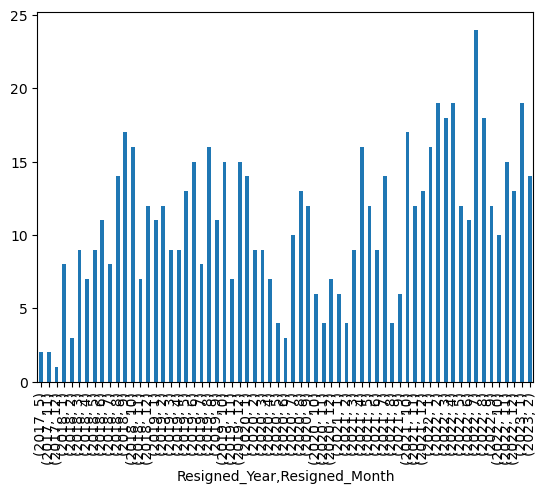

In [171]:
# Month wise bar chart

resigned_monthwise_df.plot.bar()

In [172]:
# Yearly summary of resignations

resigned_yearwise_df = pd.DataFrame()

resigned_yearwise_df = resigned_df.groupby(['Resigned_Year']).size()
resigned_yearwise_df

Resigned_Year
2017      5
2018    121
2019    141
2020     98
2021    122
2022    187
2023     33
dtype: int64

<AxesSubplot:xlabel='Resigned_Year'>

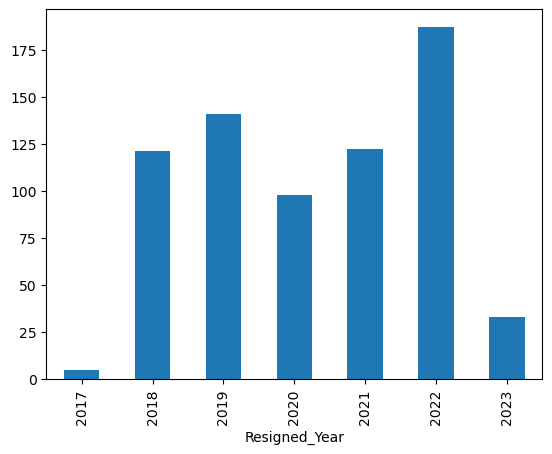

In [173]:
# Yearly summary bar chart

resigned_yearwise_df.plot.bar()

In [174]:
# Yearly average

resigned_yearwise_df.mean()

101.0

In [175]:
# Summarize department wise
resigned_deptwise_df = pd.DataFrame()
resigned_deptwise_df = resigned_df.groupby(['Dpt']).size().reset_index(name='Count')

# Set the Department Name as index
resigned_deptwise_df = resigned_deptwise_df.set_index('Dpt')
resigned_deptwise_df.head(10)

,Count
Dpt,
Administration Dept.,12
Akuressa Br.,2
Ambalangoda Br.,2
Ambalanthota Regional,1
Ambalanthota Regional Branch,4
Ambalantota,1
Ampara Regional Br.,3
Anamaduwa Br,3
Anamaduwa Regional Br,1


In [176]:
# Sort by descending
resigned_deptwise_df.sort_values('Count', ascending= False, inplace=True)
resigned_deptwise_df.head(10)

,Count
Dpt,
Contact Centre,63
Motor Claims Dpt.,53
Motor Underwriting Dpt.,28
Bancassurance Unit. Marketing,26
Fire & Miscellaneous Dpt.,25
Galle Regional Br.,17
Finance Dpt.,17
MCIC Operation,17
Kurunagala Regional Br.,16


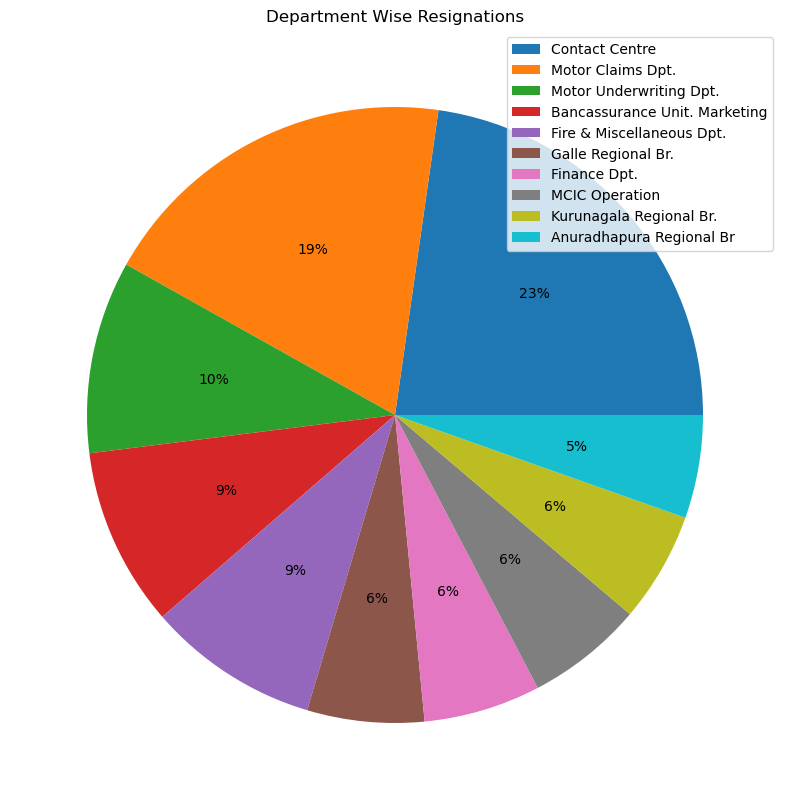

In [177]:
plot = resigned_deptwise_df.head(10).plot(kind='pie', y='Count', autopct='%1.0f%%', figsize=(10, 10), legend=True, title='Department Wise Resignations', ylabel='', labeldistance=None)   
